## Q1: How many convolutional layers are in the ResNet-18 model ?

Ans - 20

## Q2: What is the input dimension of the last linear layer ?

Ans - 512

## Q3: How many trainable parameters and how many gradients in the ResNet-18 model that you build when using SGD

In [1]:
from resnet import *
import torch
from torch.optim import SGD,  Adam
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def get_params(lis):
    return sum(p.numel() for p in lis if p.requires_grad)

def get_gradients(lis):
    return sum(p.grad.numel() for p in lis if p.requires_grad)

To get the number of  gradients, backprop needs to be done atleast once

In [2]:
net = ResNet18()

inp = torch.ones(64, 3, 32, 32)
labels = torch.ones(64).long()

opt_sgd = SGD(net.parameters(), lr = 0.01)

out = net(inp)
loss = F.cross_entropy(out, labels)

opt_sgd.zero_grad()
loss.backward()
opt_sgd.step()
print('Number of trainable parameters are',get_params(opt_sgd.param_groups[0]['params']))
print('Number of gradients are',get_gradients(opt_sgd.param_groups[0]['params']))

Number of trainable parameters are 11173962
Number of gradients are 11173962


## Q4: Same question as Q3, except now using Adam

In [3]:
net = ResNet18()

inp = torch.ones(64, 3, 32, 32)
labels = torch.ones(64).long()

opt = Adam(net.parameters(), lr = 0.01)

out = net(inp)
loss = F.cross_entropy(out, labels)

opt_sgd.zero_grad()
loss.backward()
opt.step()
print('Number of trainable parameters are',get_params(opt.param_groups[0]['params']))
print('Number of gradients are',get_gradients(opt.param_groups[0]['params']))

Number of trainable parameters are 11173962
Number of gradients are 11173962


## C3  I/O optimization starting from code in C2
Report the total time spent waiting for the Dataloader varying the number of workers starting from zero and increment the number of workers by 4

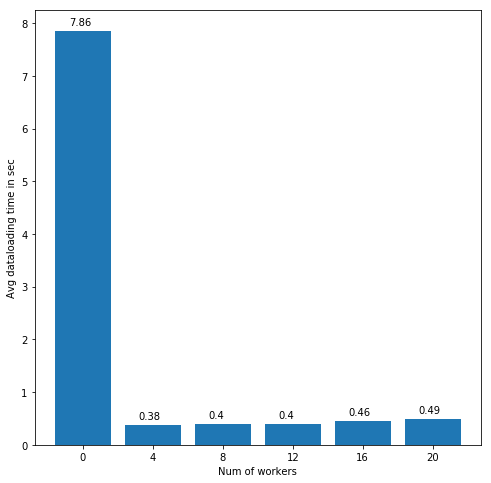

In [4]:
workers = [0,4,8,12,16,20]
dataloading_time = [7.86, 0.38, 0.4,0.4, 0.46, 0.49 ]

y_pos = np.arange(len(workers))

plt.figure(figsize = (8,8))
plt.bar(y_pos, dataloading_time, align = 'center')
plt.xticks(y_pos, workers)
plt.xlabel('Num of workers')
plt.ylabel('Avg dataloading time in sec')
 
for i in range(len(workers)):
    plt.text(x = y_pos[i] - 0.2 , y = dataloading_time[i]+0.1, s = str(dataloading_time[i]), size = 10)
plt.show()


4 workers are needed for the best performance

## C4
Visualize the data-loading time, computing time for these two runs and explain (in few words) the
differences

In [5]:
data_loading = [0.36, 0.38]
epoch_time = [29.87, 30.3]

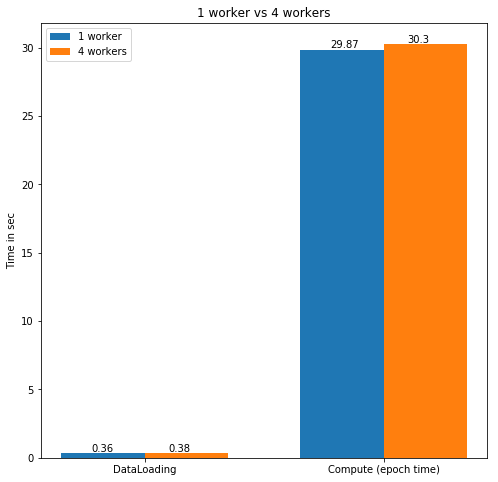

In [6]:
w1 = [0.36, 29.87]
w4 = [0.38,30.3]

ind = np.arange(2) 
width = 0.35   
plt.figure(figsize = (8,8))
plt.bar(ind, w1, width, label='1 worker')
plt.bar(ind + width, w4, width,
    label='4 workers')

plt.ylabel('Time in sec')
plt.title('1 worker vs 4 workers')

for i in range(len(w1)):
    plt.text(x = ind[i] - 0.05 , y = w1[i]+0.1, s = str(w1[i]), size = 10)
    plt.text(x = ind[i] + width / 2 + 0.1 , y = w4[i]+0.1, s = str(w4[i]), size = 10)

plt.xticks(ind + width / 2, ('DataLoading', 'Compute (epoch time)'))
plt.legend(loc='best')
plt.show()

Both dataloading time and compute time are almost the same for workers = 1 and workers = 4. 